In [1]:
import source.utilities as util
import source.loader as load
import source.analyzer as analyzer

Total Income: 13069.91
Income: category
INCOME    13068.57
OTHER         1.34
Name: transaction, dtype: float64
Total Expense: 10425.69
Expense: category
CREDIT CARD    -3126.86
EXPENSE         -461.63
PROPERTY       -6447.54
SUBSCRIPTION     -34.99
UTILITIES       -354.67
Name: transaction, dtype: float64
Category: category
CREDIT CARD     -29.99%
EXPENSE          -4.43%
PROPERTY        -61.84%
SUBSCRIPTION     -0.34%
UTILITIES         -3.4%
Name: transaction, dtype: object


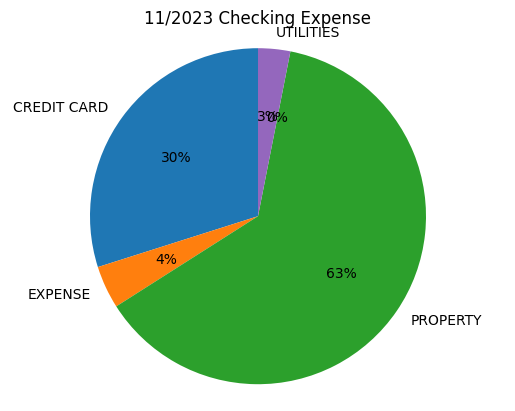

In [3]:
analyzer.analyzeChecking(11, 2023)

Total Expense: 2756.7
Expense: category
COMMUTE           55.90
DINING           325.88
ENTERTAINMENT     16.28
GROCERY          136.05
HEALTH CARE      390.65
OTHER            371.34
SERVICE          145.00
SHOPPING         795.28
SUBSCRIPTION      46.86
TRAVEL           311.96
UTILITIES        161.50
Name: transaction, dtype: float64
Category: category
COMMUTE           2.03%
DINING           11.82%
ENTERTAINMENT     0.59%
GROCERY           4.94%
HEALTH CARE      14.17%
OTHER            13.47%
SERVICE           5.26%
SHOPPING         28.85%
SUBSCRIPTION       1.7%
TRAVEL           11.32%
UTILITIES         5.86%
Name: transaction, dtype: object


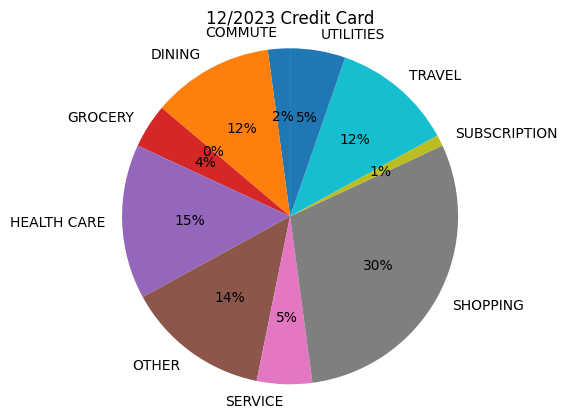

In [2]:
analyzer.analyzeCreditCard(12, 2023)

Expense: category
DINING            113.74
ENTERTAINMENT      52.79
GROCERY            72.09
SERVICE            89.54
SHOPPING         3479.41
SUBSCRIPTION      315.54
TRAVEL           3112.44
UTILITIES         689.34
Name: transaction, dtype: float64


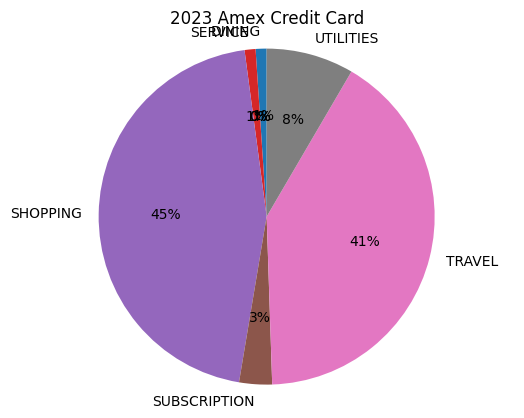

In [5]:
# Import AMEX
amexDf = load.importAmex('./input/credit/amex/12_2023.csv');
df = util.sanitizeDataframe(amexDf, sortBy='transaction');

# df.loc[:, 'transaction'] = df['transaction'].abs()
# df = df.sort_values(by=['category', 'transaction'])
# print(tabulate(df, headers='keys', tablefmt='pretty'))

# # Format the DataFrame as a table using tabulate
# formatted_table = tabulate(df, headers='keys', tablefmt='pretty')

# # Save the formatted table to a text file
# with open('./output/amex_credit_2023.txt', 'w') as file:
#     file.write(formatted_table)

# making transactions to be positive
# df = filter_df_at_month(df)
util.exportDataframe(df, 'amex')

totalExpense = df.groupby('category')['transaction'].sum()
print(f'Expense: {totalExpense}')

util.plotDataframe(df, '2023 Amex Credit Card')

Expense: category
COMMUTE           -34.80
DINING           -822.99
ENTERTAINMENT     -44.28
GROCERY          -268.40
HEALTH CARE     -1337.66
OTHER            -493.49
SERVICE          -494.44
SHOPPING         -267.02
UTILITIES        -122.79
Name: transaction, dtype: float64


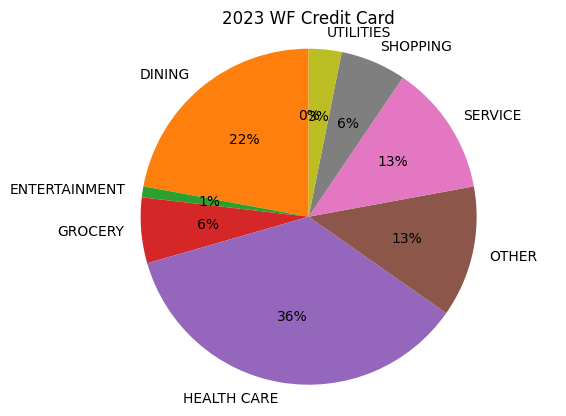

In [4]:
# Import Wells Fargo
wfDf = load.importWF('./input/wf_credit_2023.csv');
df = util.sanitizeDataframe(wfDf);

# making transactions to be positive
# df = filter_df_at_month(df)
util.exportDataframe(df, 'wf')

totalExpense = df.groupby('category')['transaction'].sum()
print(f'Expense: {totalExpense}')

util.plotDataframe(df, '2023 WF Credit Card')